## Calories Burnt Prediction

In [122]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [124]:
calories = pd.read_csv('/content/calories.csv')
exercise = pd.read_csv('/content/exercise.csv')

In [125]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [126]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [127]:
data = pd.concat([exercise,calories.Calories],axis=1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [129]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [130]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [131]:
data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


**Data Visualization**

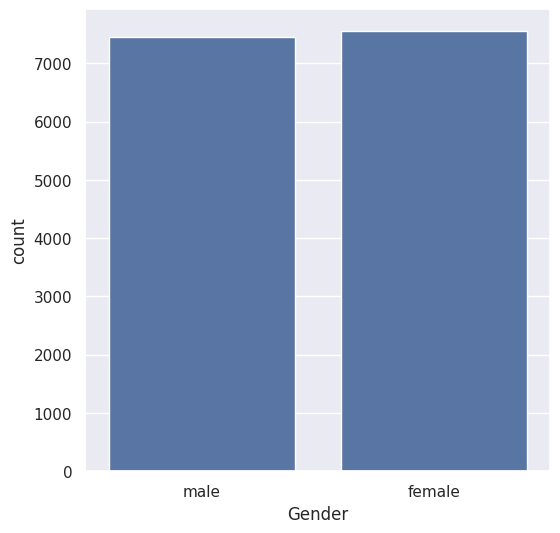

In [132]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.Gender)
plt.show()

<ipython-input-133-5b21129037b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Height)


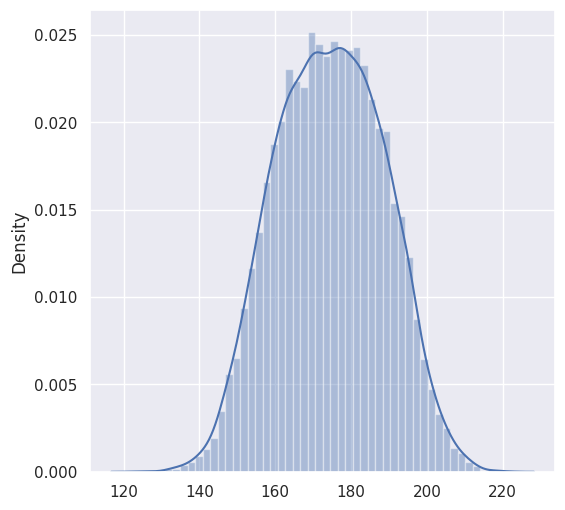

In [133]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Height)
plt.show()

<ipython-input-134-a8b99bb2583d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Weight)


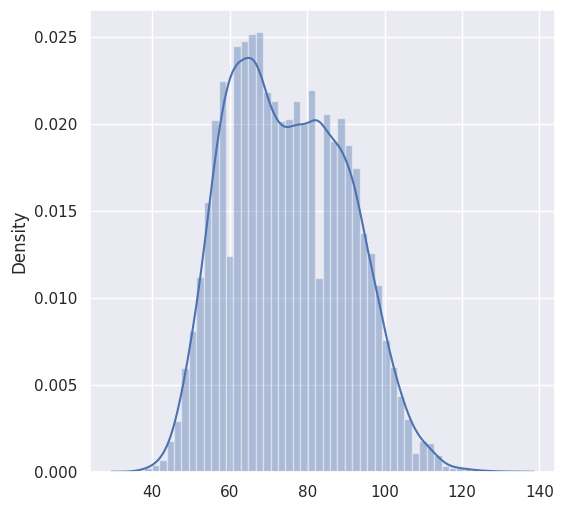

In [134]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Weight)
plt.show()

<ipython-input-135-c079db9816b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Age)


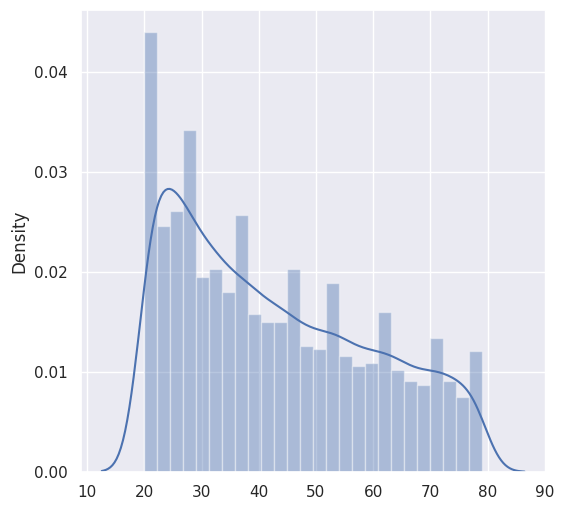

In [135]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Age)
plt.show()

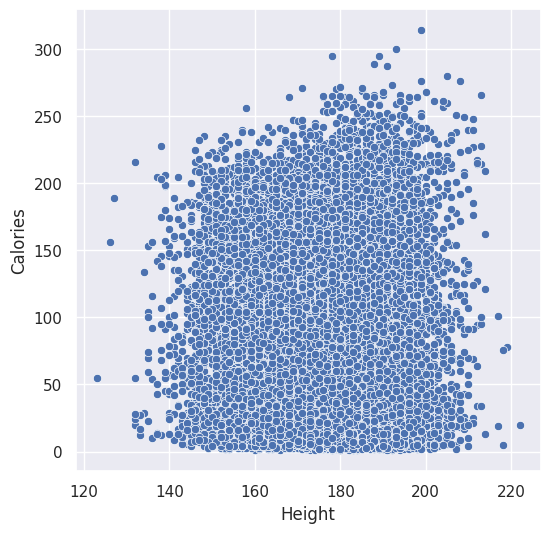

In [136]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data.Height,y=data.Calories)
plt.show()

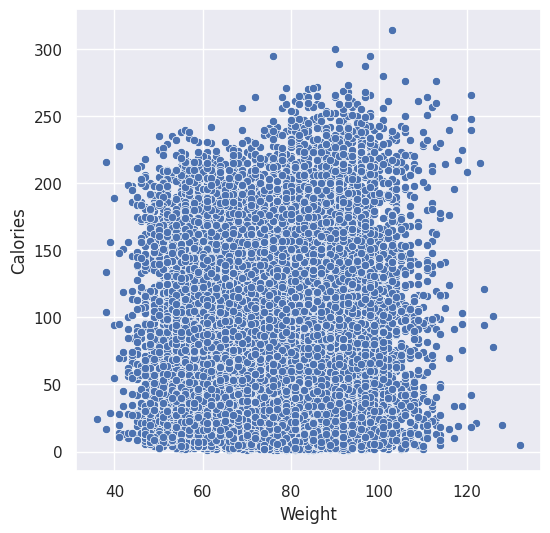

In [137]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data.Weight,y=data.Calories)
plt.show()

<ipython-input-138-66814c506673>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Duration)


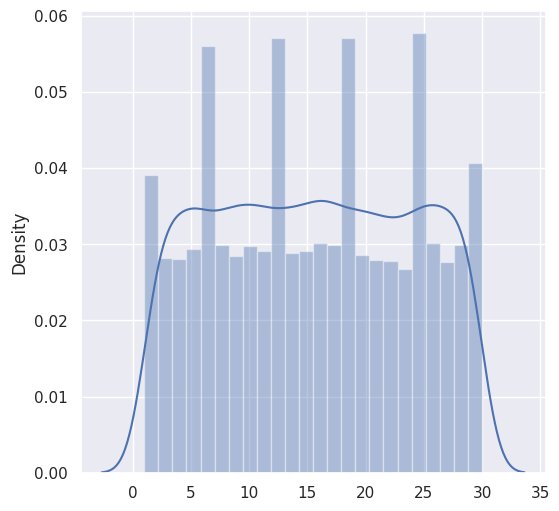

In [138]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Duration)
plt.show()

<ipython-input-139-2f74bf0e769b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Heart_Rate)


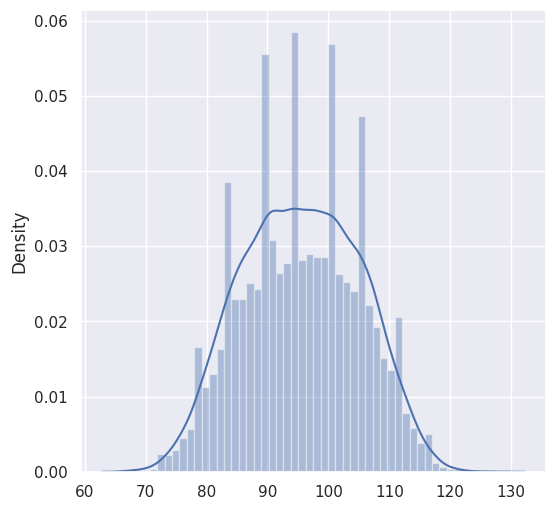

In [139]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Heart_Rate)
plt.show()

<ipython-input-140-4cb43b8b55af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Body_Temp)


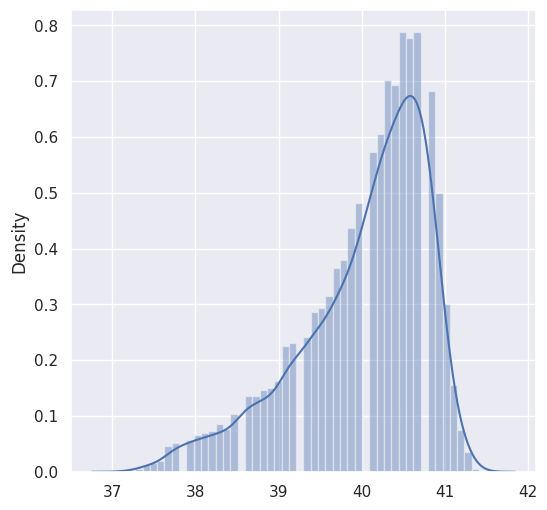

In [140]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Body_Temp)
plt.show()

In [141]:
# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Now you can calculate the correlation
correlation_matrix = data_encoded.corr()

# Print or visualize the correlation matrix
print(correlation_matrix)


                User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID        1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age           -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height        -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight        -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration      -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate    -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp      0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories      -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   
Gender_female  0.000687 -0.003222 -0.710534 -0.783186 -0.003440   -0.011555   
Gender_male   -0.000687  0.003222  0.710534  0.783186  0.003440    0.011555   

               Body_Temp  Calories  Gender_female  Gender_male  
User_ID         0.000923 -0.001661       0.000687    -0.000687  


In [142]:
X = data.drop(['User_ID','Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Calories'],axis=1,index=None)
y = data.drop(['User_ID','Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Duration'],axis=1)

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
X_train.shape,X_test.shape

((12000, 1), (3000, 1))

In [145]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [146]:
pred = lr.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

0.9123562018290068

In [147]:
pred1 = lr.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.914504752724938

In [148]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred = dt.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

0.9282248617533129

In [149]:

pred1 = dt.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.931790696825987

In [150]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9282236962948117

In [151]:
pred1 = rf.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9318297797862247

In [152]:
X = data.drop(['User_ID','Gender','Age','Height','Weight','Calories'],axis=1,index=None)
y = data.drop(['User_ID','Gender','Age','Height','Weight','Duration'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((12000, 3), (3000, 3))

In [153]:
lr.fit(X_train,y_train)
pred = lr.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

0.9820610670750405

In [154]:
pred1 = lr.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9821528310671884

In [155]:
dt.fit(X_train,y_train)
pred1 = dt.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9787271669321355

In [156]:
rf.fit(X_train,y_train)
pred1 = rf.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9827192425483394

In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [158]:
X = data.drop(['User_ID','Calories'],axis=1,index=None)
y = data.drop(['User_ID','Duration'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((12000, 7), (3000, 7))

In [159]:
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
score = metrics.r2_score(y_test,pred)
score

0.9953276735893899

In [160]:
dt.fit(X_train,y_train)
pred1 = dt.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.8895101922681116

In [161]:
rf.fit(X_train,y_train)
pred1 = rf.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9554379239836507